<a href="https://colab.research.google.com/github/Dhamu785/AI-scratch/blob/main/TensorFlow/04_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_circles
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **Make dataset**

In [2]:
n_sample = 1000

x,y = make_circles(n_sample, noise=0.02, random_state=42)


In [3]:
df = pd.DataFrame({"X0":x[:,0], "x1":x[:,1],"Result":y})
df.head()

,X0,x1,Result
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0


In [4]:
df['Result'].value_counts()

1    500
0    500
Name: Result, dtype: int64

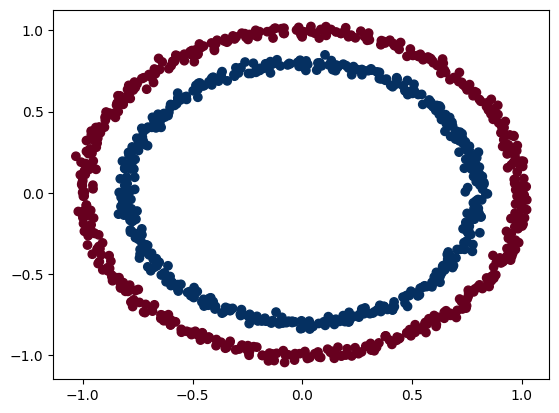

In [5]:
plt.scatter(df['X0'],df['x1'], c=y, cmap=plt.cm.RdBu)
plt.show()

## **Model-1**

In [6]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_0.compile(optimizer=tf.keras.optimizers.SGD(), loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = model_0.fit(x,y,epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 23ms/step - loss: 5.2513 - accuracy: 0.4640
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 4.5160 - accuracy: 0.4640
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 2.8169 - accuracy: 0.4750
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.7592 - accuracy: 0.4900
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.7116 - accuracy: 0.4970
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6997 - accuracy: 0.4930
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.4790
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4760
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4570
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5010
Epoch 11/50
32/32 

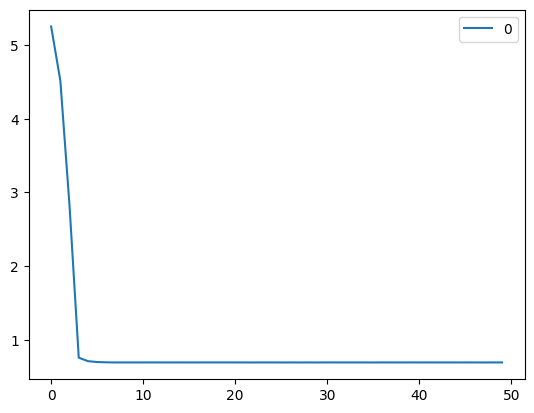

In [7]:
pd.DataFrame(history.history['loss']).plot()
plt.show()

## **Improving the model by tuning hyper-parameters**

In [8]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='ReLU'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model_1.compile(optimizer=tf.keras.optimizers.SGD(), loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = model_1.fit(x,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 2s 15ms/step - loss: 2.4219 - accuracy: 0.4110
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7931 - accuracy: 0.4040
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7425 - accuracy: 0.4020
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7125 - accuracy: 0.4580
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.4990
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5440
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.6020
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.6510
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6352 - accuracy: 0.6650
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6277 - accuracy: 0.7000


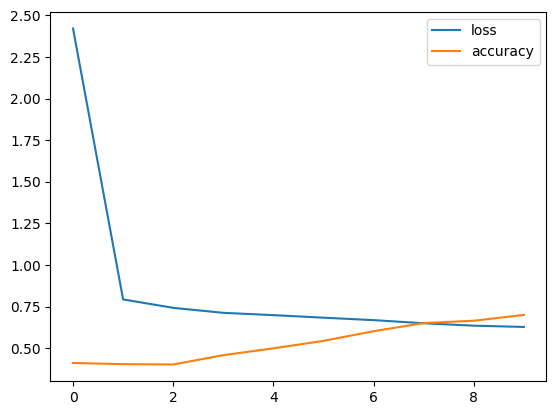

In [9]:
pd.DataFrame(history.history).plot(label="RRR")
plt.show()

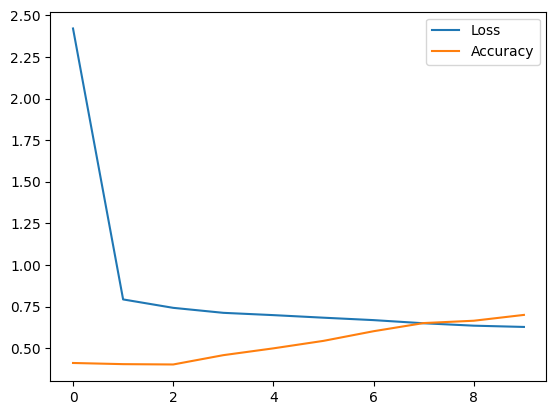

In [10]:
# manual labelling of legends

plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['accuracy'], label="Accuracy")
plt.legend(loc="upper right")
plt.show()

## **Visuals**
1. [Web](https://cs231n.github.io/neural-networks-case-study/)
2. [HitHub]( https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb)

### **Development and understanding**

In [11]:
x_min, x_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1
y_min, y_max = x[:,1].min() - 0.1, x[:,1].max() + 0.1

print(x_min, x_max, y_min, y_max)

-1.1311772642021014 1.1222376592444214 -1.1445211216573197 1.123333265815406


In [12]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

In [13]:
x_in = np.c_[xx.ravel(), yy.ravel()]
x_in

array([[-1.13117726, -1.14452112],
       [-1.1084155 , -1.14452112],
       [-1.08565373, -1.14452112],
       ...,
       [ 1.07671413,  1.12333327],
       [ 1.09947589,  1.12333327],
       [ 1.12223766,  1.12333327]])

In [14]:
y_pred = model_1.predict(x_in)

313/313 [==============================] - 0s 903us/step


In [15]:
y_pred

array([[0.18853322],
       [0.19403428],
       [0.19953546],
       ...,
       [0.28139964],
       [0.2778129 ],
       [0.27422607]], dtype=float32)

In [16]:
yyy = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

In [17]:
xx.shape

(100, 100)

In [18]:
np.round(np.max(y_pred, axis=1))[:80]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### **Function**

In [19]:
def vis(model, x, y):
    x_min, x_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1
    y_min, y_max = x[:,1].min() - 0.1, x[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    yyy = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
    plt.contourf(xx, yy, yyy, cmap=plt.cm.RdYlBu, alpha=0.5)
    plt.scatter(x[:,0],x[:,1], c=y, s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

313/313 [==============================] - 2s 7ms/step


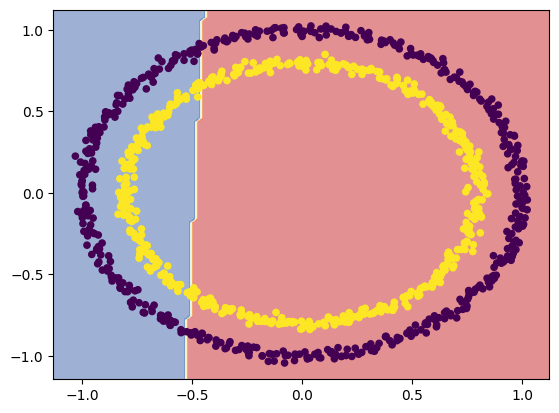

In [20]:
vis(model_0, x,y)

313/313 [==============================] - 0s 961us/step


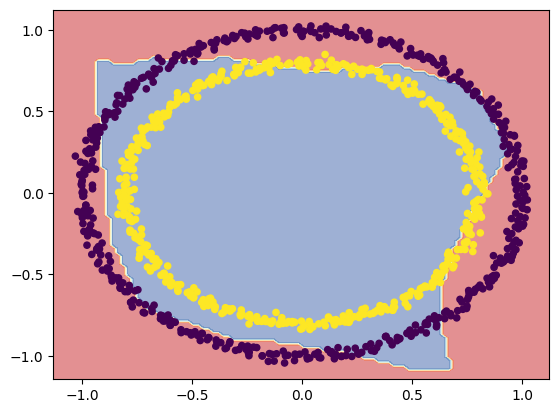

In [21]:
vis(model_1, x,y)

## **Callback**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Result', axis=1)
Y = df['Result']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [24]:
from keras.src.callbacks import Callback
# Building the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='ReLU', input_shape=(2,)),
    tf.keras.layers.Dense(30, activation='ReLU'),
    tf.keras.layers.Dense(20, activation='ReLU'),
    tf.keras.layers.Dense(5, activation='ReLU'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# def learn(epoch, lr):
#     return lr+epoch
# learning_recorder = tf.keras.callbacks.LearningRateScheduler(learn)

learning_recorder = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy'])

history = model_2.fit(x_train, y_train, epochs=50, callbacks = [learning_recorder])

Epoch 1/50
25/25 [==============================] - 1s 1ms/step - loss: 0.6948 - accuracy: 0.4875 - lr: 1.0000e-04
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5125 - lr: 2.2387e-04
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6899 -

In [29]:
call_back_history = pd.DataFrame(history.history)
call_back_history.head()

,loss,accuracy,lr
0,0.694774,0.48750,0.000100
1,0.694156,0.50250,0.000112
2,0.693489,0.49750,0.000126
3,0.692866,0.50125,0.000141
4,0.692282,0.50000,0.000158


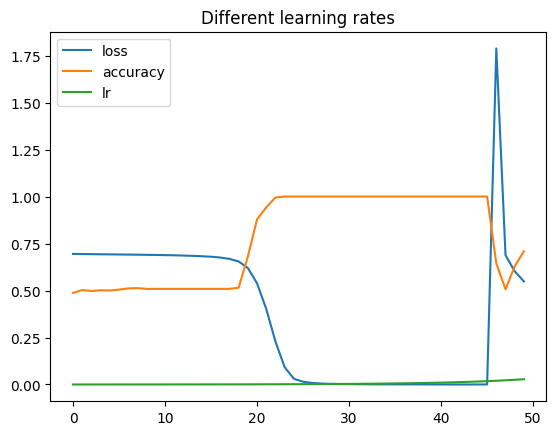

In [35]:
call_back_history.plot()
plt.title("Different learning rates")
plt.show()

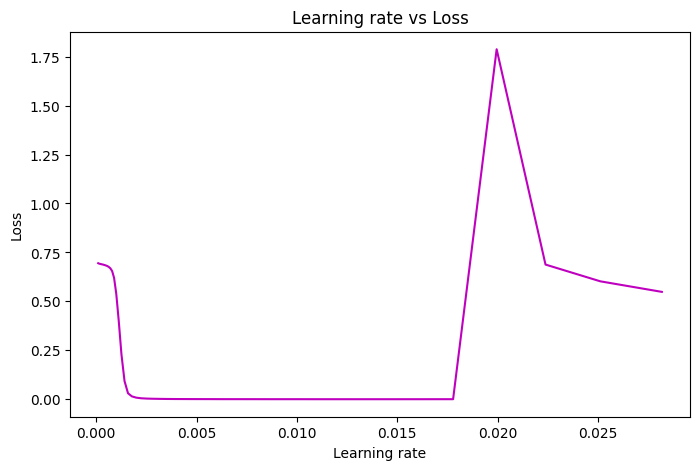

In [48]:
plt.figure(figsize=(8,5))
plt.plot(call_back_history['lr'], call_back_history['loss'], 'm')
plt.title("Learning rate vs Loss")
plt.xlabel("Learning rate")
plt.ylabel("Loss")
# plt.xticks(call_back_history['lr'])
plt.show()

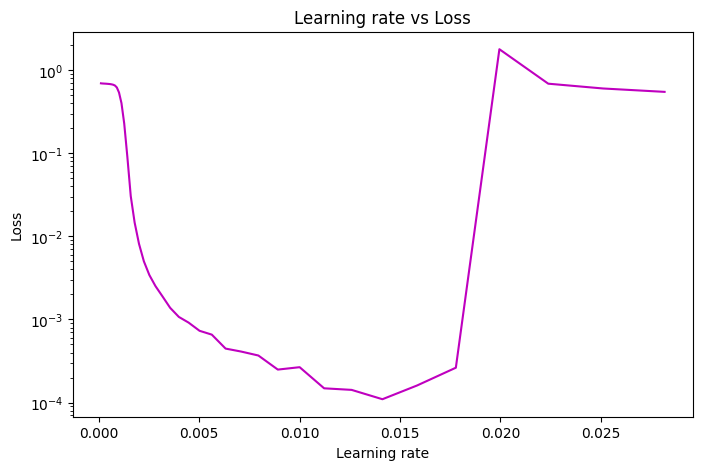

In [50]:
plt.figure(figsize=(8,5))
plt.semilogy(call_back_history['lr'], call_back_history['loss'], 'm')
plt.title("Learning rate vs Loss")
plt.xlabel("Learning rate")
plt.ylabel("Loss")
# plt.xticks(call_back_history['lr'])
plt.show()

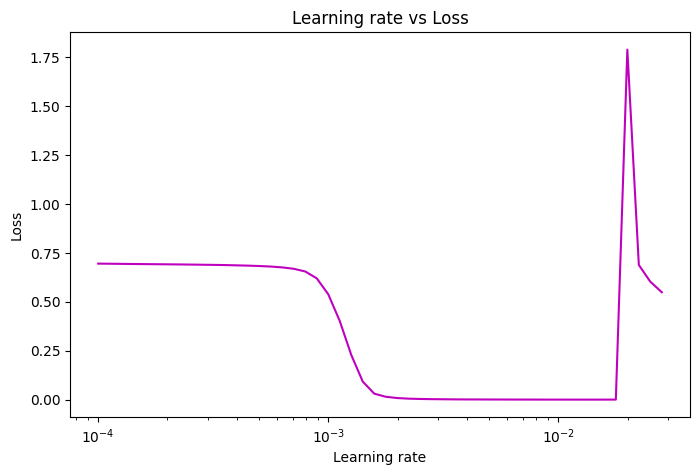

In [56]:
plt.figure(figsize=(8,5))
plt.semilogx(call_back_history['lr'], call_back_history['loss'], 'm')
plt.title("Learning rate vs Loss")
plt.xlabel("Learning rate")
plt.ylabel("Loss")
# plt.xticks(call_back_history['lr'])
plt.show()

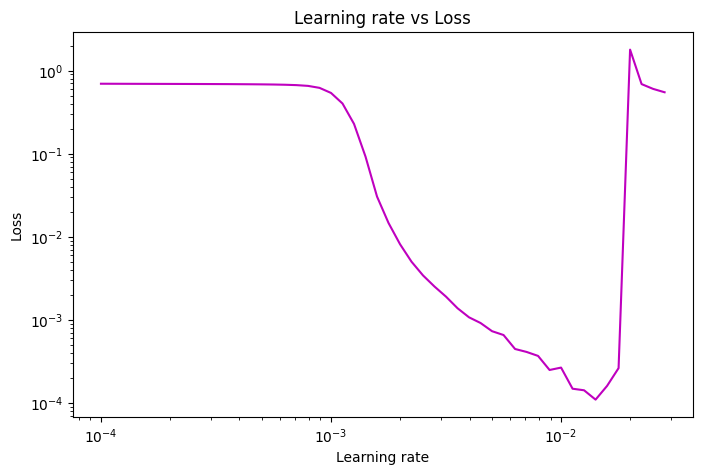

In [55]:
plt.figure(figsize=(8,5))
plt.loglog(call_back_history['lr'], call_back_history['loss'], 'm')
plt.title("Learning rate vs Loss")
plt.xlabel("Learning rate")
plt.ylabel("Loss")
# plt.xticks(call_back_history['lr'])
plt.show()

In [ ]:
# Based on the above result tuning the learning rate to 0.013


In [57]:
model_2.evaluate(x_test, y_test)

7/7 [==============================] - 1s 96ms/step - loss: 0.5789 - accuracy: 0.6850


[0.5788838863372803, 0.6850000023841858]

In [62]:
from keras.src.callbacks import Callback
# Building the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='ReLU', input_shape=(2,)),
    tf.keras.layers.Dense(30, activation='ReLU'),
    tf.keras.layers.Dense(20, activation='ReLU'),
    tf.keras.layers.Dense(5, activation='ReLU'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# def learn(epoch, lr):
#     return lr+epoch
# learning_recorder = tf.keras.callbacks.LearningRateScheduler(learn)

# learning_recorder = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.014), loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy'])

history_3 = model_3.fit(x_train, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 1ms/step - loss: 0.6806 - accuracy: 0.5700
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5425
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.8150
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2264 - accuracy: 0.9663
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0660 - accuracy: 0.9912
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 0.9900
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9975
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.9987
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/10
25/25 [==============================] - 0s 1ms/step - loss: 8.1236e-04 - accuracy: 1.0000


In [63]:
model_3.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 7.5381e-04 - accuracy: 1.0000


[0.0007538070785813034, 1.0]

In [67]:
x_train.to_numpy()

array([[ 0.90785074,  0.40699742],
       [ 0.76681163,  0.18278451],
       [-0.77467126, -0.1764085 ],
       ...,
       [-0.52617975, -0.85263787],
       [-0.08541841,  0.98093438],
       [-0.70371814, -0.45578992]])

313/313 [==============================] - 1s 3ms/step


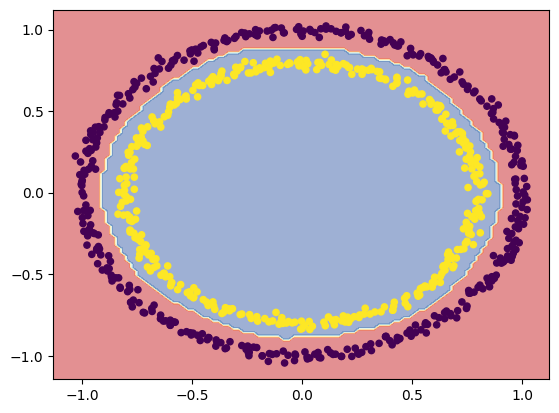

In [68]:
vis(model_3, x_train.to_numpy(), y_train)

313/313 [==============================] - 2s 7ms/step


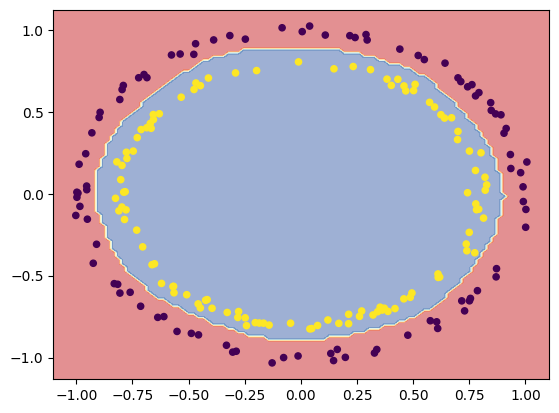

In [69]:
vis(model_3, x_test.to_numpy(), y_test)

## **Model evaluation**
- Accuracy
- Precision
- Recall
- F1-score
- Confusion matrix
- Classification report (from sk-learn)

In [95]:
loss, accuracy = model_3.evaluate(x_test, y_test)
print(f"Loss for test data : {loss}")
print(f"Accuracy for the test data : {(accuracy*100):.2f}%")

7/7 [==============================] - 1s 83ms/step - loss: 7.5381e-04 - accuracy: 1.0000
Loss for test data : 0.0007538070785813034
Accuracy for the test data : 100.00%


In [91]:
# Testing....................
x_test.iloc[1].to_numpy()

array([-0.7961473 ,  0.17274678])

In [92]:
x_test.iloc[:1]

,X0,x1
833,-0.930401,0.371579


In [89]:
model_3.predict(tf.constant([x_test.iloc[1].to_numpy()]))

# Testing ended...................

1/1 [==============================] - 0s 33ms/step


array([[0.9989975]], dtype=float32)

### **Confusion matrix**

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [100]:
y_preds = model_3.predict(x_test)
y_preds = tf.round(y_preds)

print(y_preds[:5])
print()
print(y_test[:5])

7/7 [==============================] - 0s 4ms/step
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]], shape=(5, 1), dtype=float32)

833    0
817    1
982    1
357    0
515    1
Name: Result, dtype: int64


In [107]:
confusion_matrix(y_test, y_preds)

array([[ 93,   0],
       [  0, 107]])

<Axes: >

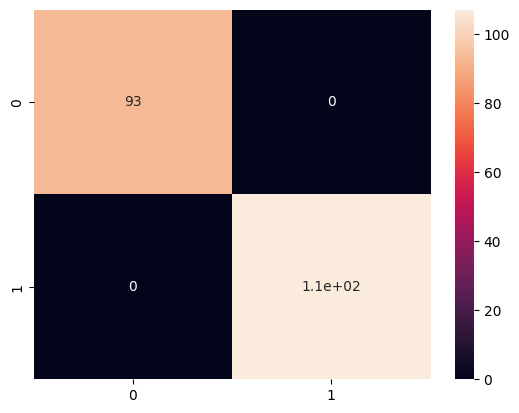

In [108]:
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)

## **Key takeaways**
- Used to fix the decimal points while printing the numbers {(accuracy*100):.2f}
- Scientific representation of the numbers - 1e-2

In [103]:
a = np.array([[1,2],[3,4]])
b = np.array([[6,7],[8,9]])
a@b

array([[22, 25],
       [50, 57]])